In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
#Dataset and other docs here: https://drive.google.com/drive/folders/1-S7eu5K1By2bmOLMoB7elgHCBq3qgcEW?usp=share_link

In [ ]:
data = pd.read_csv('/content/bengaluru.csv')

In [ ]:
data.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'FeelsLikeC'],
      dtype='object')

In [ ]:
'''
['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'FeelsLikeC']
'''

In [ ]:
data[data.isnull().any(axis=1)]

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,FeelsLikeC


In [ ]:
data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,FeelsLikeC
0,27,12,0,11.6,5,1,18,18,2,91,0.0,1014,14,10,109,8,18
1,27,12,0,11.6,5,1,17,17,2,93,0.0,1014,14,7,85,6,17
2,27,12,0,11.6,5,1,16,16,2,94,0.0,1014,13,5,61,4,16
3,27,12,0,11.6,5,1,15,15,2,96,0.0,1014,12,2,37,3,15
4,27,12,0,11.6,5,1,18,18,1,88,0.0,1015,14,5,45,3,18


In [ ]:
before_rows = data.shape[0]
print(before_rows)
data = data.dropna()
after_rows = data.shape[0]
print(after_rows)

96432
96432


In [ ]:
data.shape

(96432, 17)

In [ ]:
X=data.values[:,0:16]
y=data.values[:,16]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (96432, 16)
Shape of y =  (96432,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
reg = DecisionTreeRegressor(max_depth=4)

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_7 <= 22.50
|   |--- feature_7 <= 19.50
|   |   |--- feature_7 <= 17.50
|   |   |   |--- feature_7 <= 15.50
|   |   |   |   |--- value: [14.54]
|   |   |   |--- feature_7 >  15.50
|   |   |   |   |--- value: [16.65]
|   |   |--- feature_7 >  17.50
|   |   |   |--- feature_7 <= 18.50
|   |   |   |   |--- value: [18.00]
|   |   |   |--- feature_7 >  18.50
|   |   |   |   |--- value: [19.00]
|   |--- feature_7 >  19.50
|   |   |--- feature_7 <= 21.50
|   |   |   |--- feature_7 <= 20.50
|   |   |   |   |--- value: [20.00]
|   |   |   |--- feature_7 >  20.50
|   |   |   |   |--- value: [21.00]
|   |   |--- feature_7 >  21.50
|   |   |   |--- feature_6 <= 24.50
|   |   |   |   |--- value: [22.18]
|   |   |   |--- feature_6 >  24.50
|   |   |   |   |--- value: [23.56]
|--- feature_7 >  22.50
|   |--- feature_6 <= 29.50
|   |   |--- feature_6 <= 26.50
|   |   |   |--- feature_6 <= 25.50
|   |   |   |   |--- value: [24.66]
|   |   |   |--- feature_6 >  25.50
|   |   |   |   |--- val

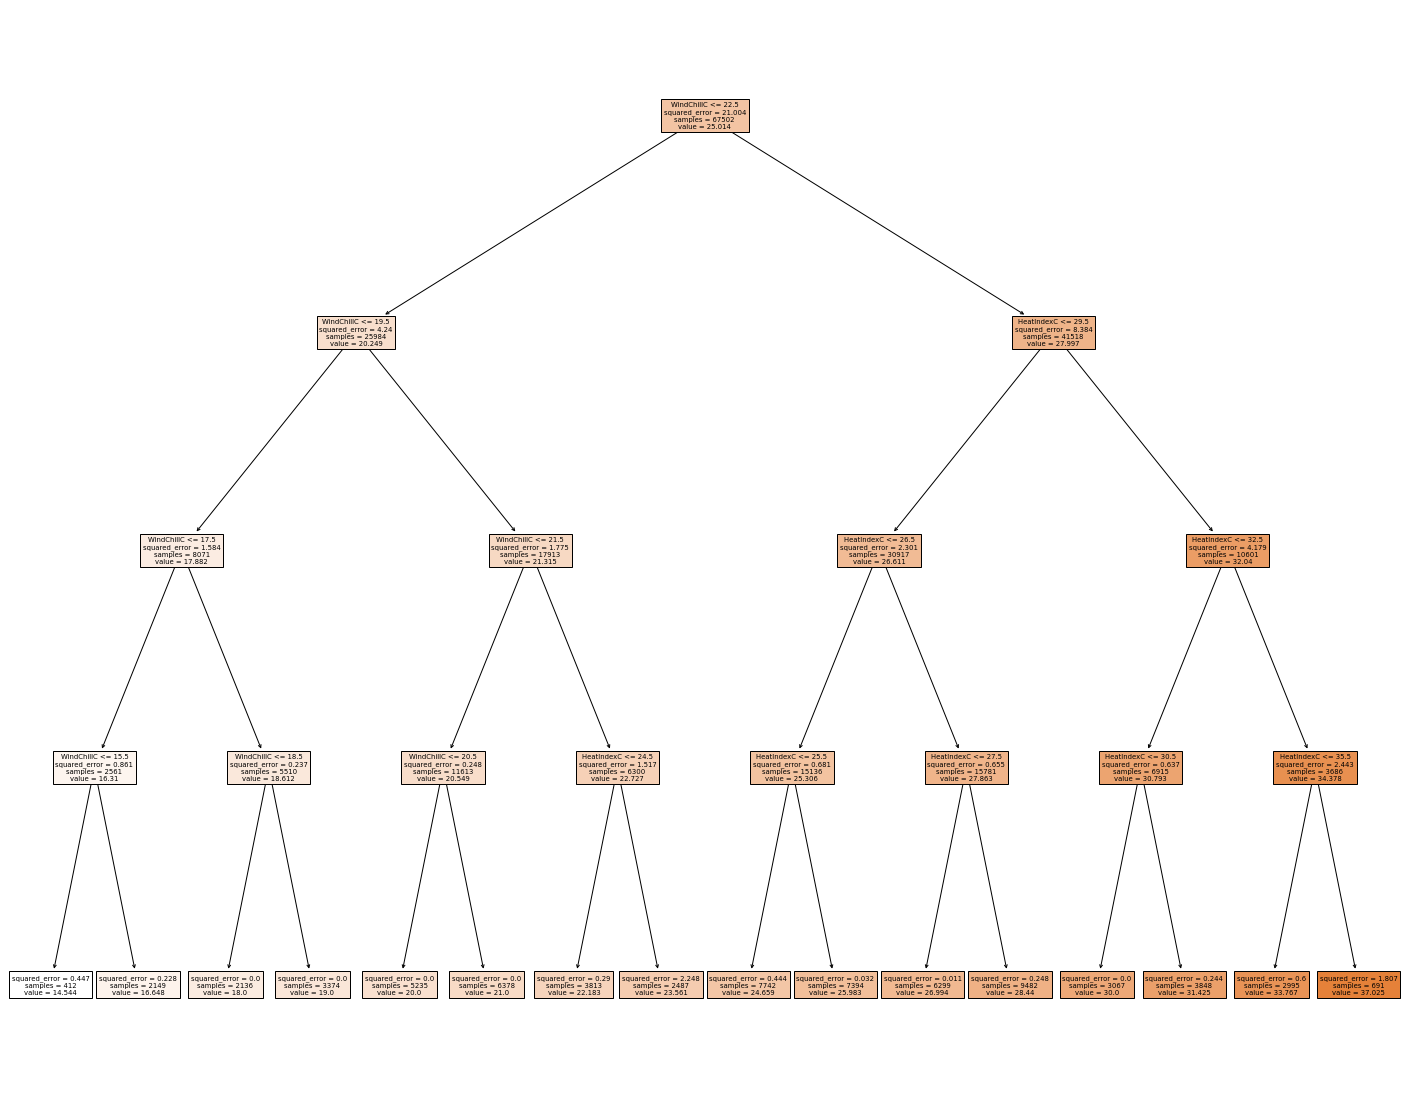

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'], filled=True)

In [ ]:
y_pred = reg.predict(X_test)

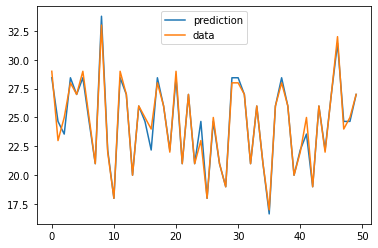

In [ ]:
plt.plot(y_pred[:50], label = 'prediction')
plt.plot(y_test[:50], label = 'data')
plt.legend()
plt.show()

In [ ]:
for i in range(20):
  print(y_test[i], y_pred[i])

29.0 28.4399915629614
23.0 24.659002841642987
25.0 23.561318858061924
28.0 28.4399915629614
27.0 26.99428480711224
29.0 28.4399915629614
25.0 24.659002841642987
21.0 21.0
33.0 33.7669449081803
22.0 22.183057959611855
18.0 18.0
29.0 28.4399915629614
27.0 26.99428480711224
20.0 20.0
26.0 25.982959156072493
25.0 24.659002841642987
24.0 22.183057959611855
28.0 28.4399915629614
26.0 25.982959156072493
22.0 22.183057959611855


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg.predict(X_test))

0.2912537570555891

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)